## Import Library

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

## Import Dataset

In [ ]:
# import data
! gdown --id 17JRs6xeZAFoeldscbTK4e9Ne6xhNDvc4

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17JRs6xeZAFoeldscbTK4e9Ne6xhNDvc4
To: /content/16P.csv
100% 8.98M/8.98M [00:00<00:00, 71.6MB/s]


In [ ]:
mbti = pd.read_csv('16P.csv', encoding='cp1252')
mbti.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


In [ ]:
# Melihat informasi tentang data
print(mbti.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response Id                                                                                                           59999 non-null  int64 
 1   You regularly make new friends.                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 4   You often 

In [ ]:
# Memeriksa apakah ada data kosong
print("Jumlah data kosong: ", mbti.isnull().sum().sum())

Jumlah data kosong:  0


In [ ]:
# Memeriksa apakah ada data duplikat 
print("Jumlah data duplikat:", mbti.duplicated().sum())

Jumlah data duplikat: 0


In [ ]:
mbti["Personality"].value_counts()

ESFP    3769
INFJ    3761
ENFP    3760
ENTP    3760
ESTJ    3759
ISTJ    3756
ISTP    3755
ESTP    3749
ISFP    3746
ESFJ    3746
ENFJ    3743
INTJ    3743
INTP    3742
ISFJ    3739
ENTJ    3737
INFP    3734
Name: Personality, dtype: int64

In [ ]:
# Memisahkan fitur dan label
X = mbti.iloc[:, 1:-1]  # Kolom fitur dimulai dari indeks 1 hingga sebelum kolom terakhir
y = mbti.iloc[:, -1]   # Kolom label adalah kolom terakhir

Text(0.5, 1.0, 'The number of digit classes')

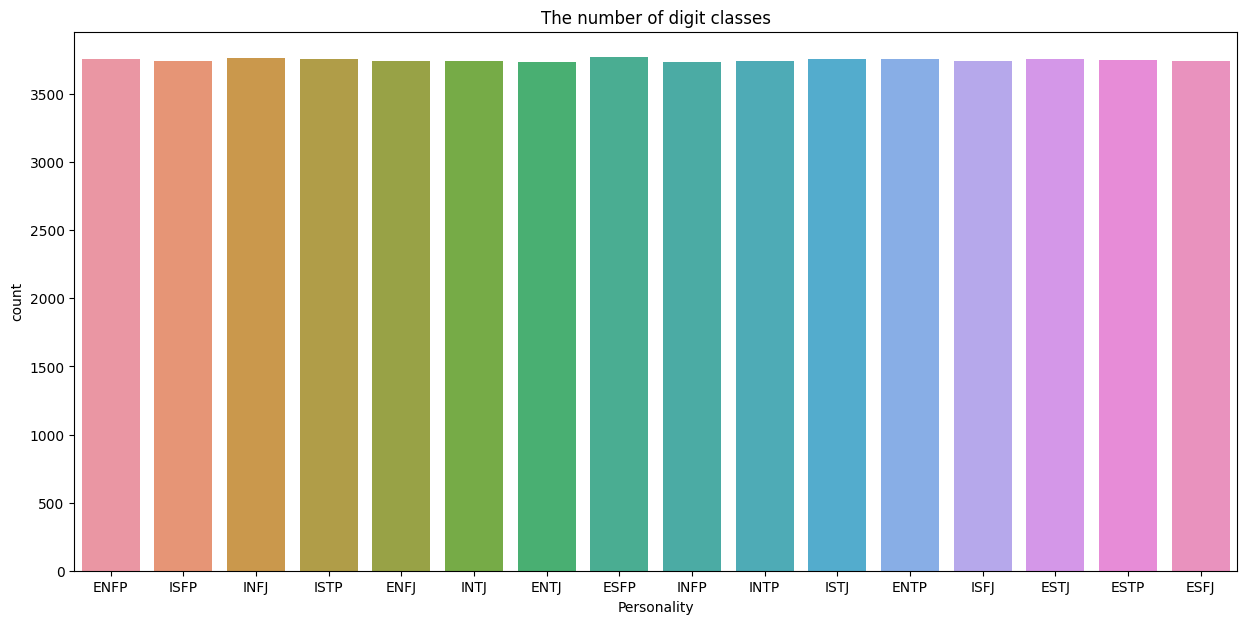

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(x=y)
plt.title("The number of digit classes")

In [ ]:
# Konversi label menjadi numerik menggunakan one-hot encoding
y_encoded = pd.get_dummies(y)

In [ ]:
# Memisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(47999, 60)
(12000, 60)
(47999, 16)
(12000, 16)


In [ ]:
# Membangun model
model = tf.keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu',),
    keras.layers.Dense(y_encoded.shape[1], activation='softmax')
])

# Menentukan fungsi loss dan optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3904      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
Total params: 9,104
Trainable params: 9,104
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Melatih model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/10
3000/3000 [==============================] - 8s 2ms/step - loss: 0.5276 - accuracy: 0.8558 - val_loss: 0.1941 - val_accuracy: 0.9636
Epoch 2/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2653 - accuracy: 0.9395 - val_loss: 0.1664 - val_accuracy: 0.9729
Epoch 3/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2309 - accuracy: 0.9514 - val_loss: 0.1608 - val_accuracy: 0.9743
Epoch 4/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2108 - accuracy: 0.9582 - val_loss: 0.1568 - val_accuracy: 0.9776
Epoch 5/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.2012 - accuracy: 0.9610 - val_loss: 0.1588 - val_accuracy: 0.9768
Epoch 6/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1934 - accuracy: 0.9621 - val_loss: 0.1536 - val_accuracy: 0.9793
Epoch 7/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.1873 - accuracy: 0.9626 - val_loss: 0.1564 - val_accuracy:

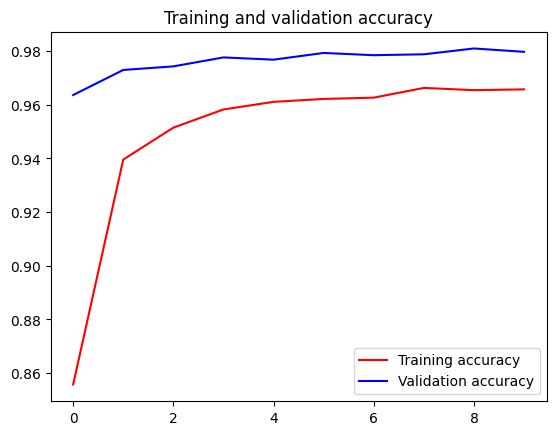

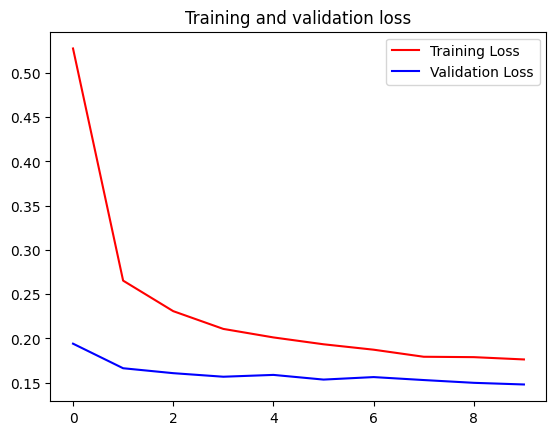

In [ ]:
# Plot grafik untuk akurasi dan loss pada training dan validasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Evaluasi model pada data pengujian
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

375/375 [==============================] - 1s 2ms/step - loss: 0.1480 - accuracy: 0.9797
Test loss: 0.14802700281143188
Test accuracy: 0.9796666502952576
